In [1]:
import os
import sys
import glob
import pylab             as pl
import numpy             as np
import matplotlib.pyplot as plt
import astropy.io.fits   as fits
import matplotlib.pyplot as plt
import numpy             as np
import matplotlib.ticker as mticker

from   mpl_toolkits.axes_grid1 import make_axes_locatable
from   astropy.table           import Table, vstack

In [2]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [3]:
import pubplot

from   gama_limits   import gama_field
from   delta8_limits import delta8_tier
from   cartesian     import rotate

In [4]:
field = 'G9'

In [5]:
gama_d8 = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_ddp_n8.fits')
gama_d8

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN,DDP [3],MVIS_Z,RANDSEP,RANDMATCH,BOUND_DIST,FILLFACTOR,DDP1_N8,DDP2_N8,DDP3_N8,DDP1_DELTA8,DDP2_DELTA8,DDP3_DELTA8
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,,,,,,mag,mag,,,mag,,,,,,,,,,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,int64,float64,float64,int64,float64,float64,int64,int64,int64,float64,float64,float64
186621,587725041704829065,185.22637399,-1.48484552,19.707304,0.15655,4,G12_Y3_013_084,5,21.00796,20.179195,19.758118,19.538584,19.657133,526.2218840329729,38.60584452582876,G12,-452.949002915617,-41.43182242297258,-11.790018871544799,0.42107773,0.3371333695571266,0,2,-0.11110247733432752,-0.027158118619969737,0.06198855923223209,0.15099516113794287,0.33207112636577363,2.12,-0.15185352,-0.331886,-18.808675567508615,-18.628643090725816,38.51597956836311,38.33594709158031,-0.06727912768008276,0.029344341562804438,0.14944575068211835,0.29451963127646774,-18.8961327589585,0.092695236,0.16392420521119658,0.0,-7.707304,0.0044451611497400645,0.0,0 .. 0,-18.802373624491857,0.76038727333628,1102174,6.116784213252362,0.9875688558651398,33,51,0,1.612586129988323,1.2760275483027193,-1.0
543518,588848898852848091,211.76792957,-0.89235905,19.017689,0.05258,4,G15_Y3_013_228,6,20.9524,19.807358,19.110891,18.695219,18.314579,164.25889781301044,36.07764452179613,G15,-132.65873114579134,-82.14913456297639,-2.4303746870844907,0.69646645,0.7649974613944354,0,5,-0.15789098198346954,-0.22642199745535949,0.06992529999751626,0.0987676138300845,0.6676241320902834,0.8,-0.0510026,-0.042064,-17.078878471273992,-17.087817070651862,36.09656722249469,36.10550582187256,-0.14680015512782418,-0.19364531489911876,0.06992472323437693,0.07152997481454451,-17.07887789451085,0.7823105,0.0739139156122269,0.0,-7.0176888,0.002186226246885435,0.0,0 .. 0,-16.289358459553448,0.7412322108748586,2197206,0.0,0.45135347142467197,32,36,85,4.543157949727292,2.5152841618656976,3.546603607971738
145492,587724650869751862,184.80116057,-1.36268178,18.077238,0.10614,4,G12_Y1_IS1_187,6,19.808687,18.545658,18.033491,17.711723,17.538279,344.76795967919503,37.68763449369432,G12,-310.50414838876634,-26.080095695731455,-7.412209189910756,0.512167,0.5042607723990307,0,3,-0.1005257374319281,-0.09261953290224781,0.09945360289805828,0.13844408330998506,0.4731764965167842,2.12,-0.1029558,-0.22501679,-19.606894210431527,-19.484833226058434,37.68413229331727,37.56207130894418,-0.09889375873716971,-0.09026459990901585,0.1178311196250314,0.1749106898046474,-19.6252717271585,1.7227612,0.24168470123991342,0.0,-6.077238,0.006586003369639508,0.0,0 .. 0,-17.90010511337135,0.6061140389260695,325343,5.476858636750384,0.941873979625865,13,19,0,0.07913211075755311,-0.11093088139392315,-1.0
136410,587724650328490122,174.75681895,-1.77149809,18.929632,0.10328,5,369383993293957120,6,19.882893,19.167995,18.922789,18.57444,18.607363,334.80363253505897,37.623950806662464,G12,-302.0479121081842,27.718053402410643,-9.381089858155741,0.24520683,0.24179980777578158,0,2,-0.10417277610092178,-0.10076575099096118,0.060910488024232726,0.05270176921079077,0.25341555169918417,2.12,-0.1001816,-0.2189536,-18.655047505855464,-18.536275513231658,37.58467

In [6]:
gama_d8['ZGAMA'].min(), gama_d8['ZGAMA'].max()

(0.03903, 0.26299)

In [7]:
np.unique(gama_d8['FIELD'].data)

array([b'G12', b'G15', b'G9'], dtype='|S4')

In [8]:
gama_d8 = gama_d8[gama_d8['FIELD'] == field]

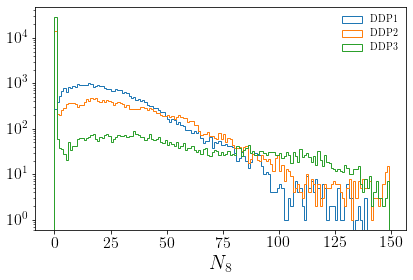

In [9]:
bins = np.arange(-1., 150., 1.)
 
_ = pl.hist(gama_d8['DDP1_N8'], histtype='step', bins=bins, label='DDP1')
_ = pl.hist(gama_d8['DDP2_N8'], histtype='step', bins=bins, label='DDP2')
_ = pl.hist(gama_d8['DDP3_N8'], histtype='step', bins=bins, label='DDP3')

pl.xlabel(r'$N_8$')
pl.yscale('log')
pl.legend(frameon=False)

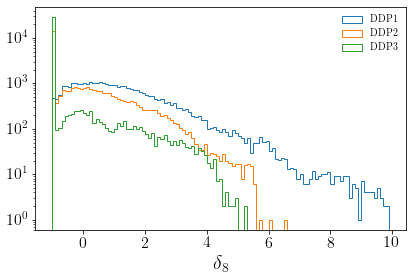

In [10]:
bins = np.arange(-1., 10., 0.1)

_ = pl.hist(gama_d8['DDP1_DELTA8'], histtype='step', bins=bins, label='DDP1')
_ = pl.hist(gama_d8['DDP2_DELTA8'], histtype='step', bins=bins, label='DDP2')
_ = pl.hist(gama_d8['DDP3_DELTA8'], histtype='step', bins=bins, label='DDP3')

pl.xlabel(r'$\delta_8$')
pl.yscale('log')
pl.legend(frameon=False)

In [11]:
gama_d8.meta

OrderedDict([('EXTNAME', 'TilingCat'),
             ('TCOMM1', 'GAMA ID'),
             ('TUCD1', 'meta.id;meta.main'),
             ('TCOMM2', 'SDSS objid'),
             ('TUCD2', 'meta.id'),
             ('TCOMM3', 'J2000 coordinate'),
             ('TUCD3', 'pos.eq.ra'),
             ('TCOMM4', 'J2000 coordinate'),
             ('TUCD4', 'pos.eq.dec'),
             ('TCOMM5', '3-arcsec fiber magnitude'),
             ('TUCD5', 'phot.mag;em.opt.R'),
             ('TCOMM6', 'Extinction-corrected SDSS DR7 Petrosian mag'),
             ('TUCD6', 'phot.mag;em.opt.R'),
             ('TCOMM7', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD7', 'phot.mag;em.opt.U'),
             ('TCOMM8', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD8', 'phot.mag;em.opt.B'),
             ('TCOMM9', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD9', 'phot.mag;em.opt.R'),
             ('TCOMM10', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD10', 'phot.mag;em.opt.I

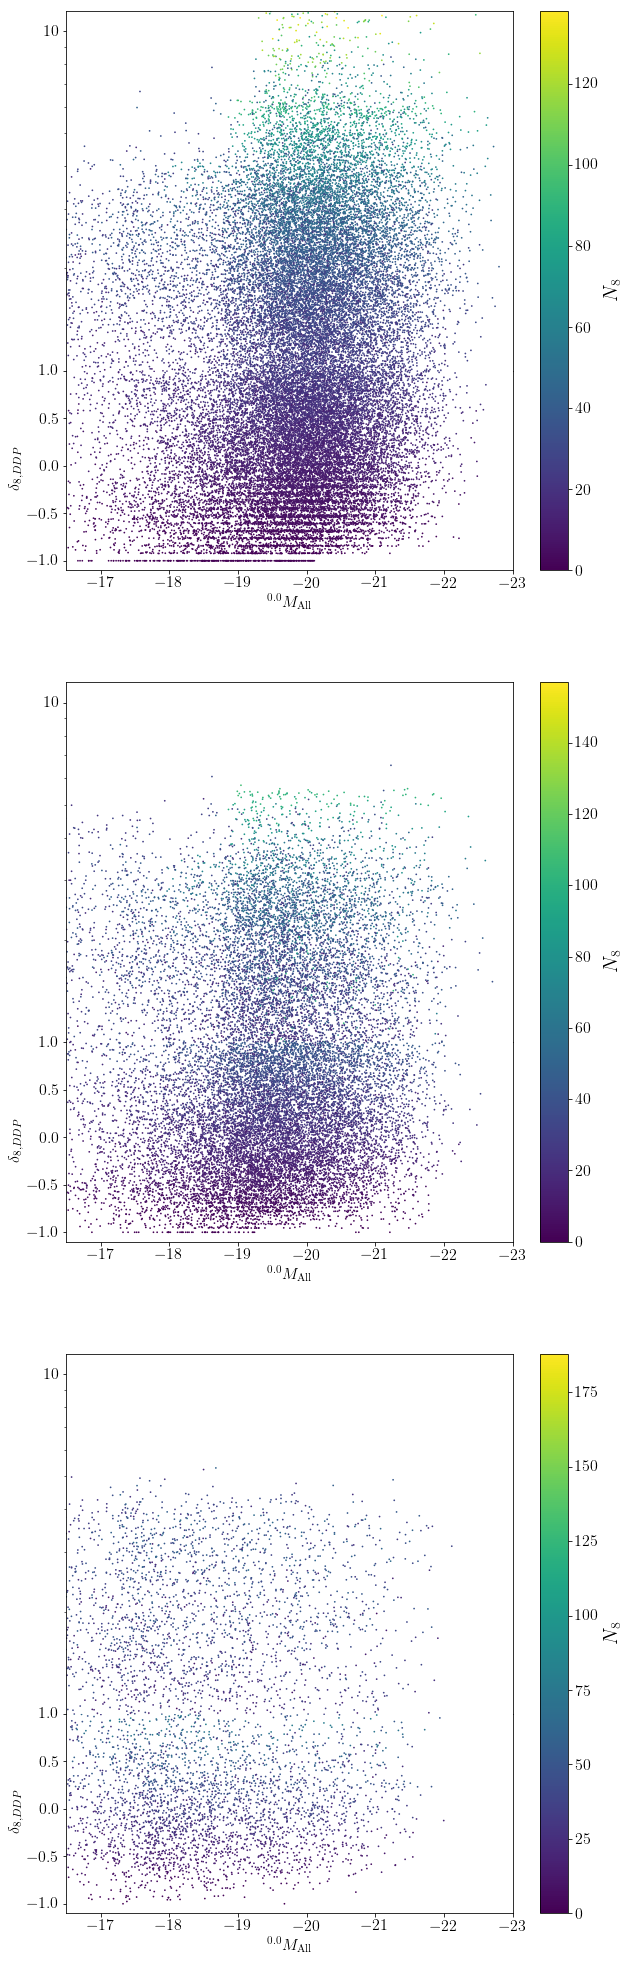

In [12]:
fig, axes = plt.subplots(3, 1, figsize=(10, 35))

for idx, ax in enumerate(axes):
    ddp_num = idx + 1

    isin  = (gama_d8['ZGAMA'] <= gama_d8.meta['DDP{}_ZMAX'.format(ddp_num)])
    isin &= (gama_d8['ZGAMA'] >= gama_d8.meta['DDP{}_ZMIN'.format(ddp_num)])
    
    sc = ax.scatter(gama_d8['MALL_0P0'][isin],\
                    gama_d8['DDP{}_DELTA8'.format(ddp_num)][isin],\
                    c=gama_d8['DDP{}_N8'.format(ddp_num)][isin],\
                    marker='.',\
                    lw=0.0,\
                    s=12)

    ax.set_xlabel(r'$^{0.0}M_{\rm All}$', fontsize=16)
    ax.set_ylabel(r'$\delta_{8,DDP}$', fontsize=16)

    ax.set_xlim(-23., -16.)
    ax.set_ylim(-1.1, 1.)
    
    ax.spines['top'].set_visible(False)
    
    divider = make_axes_locatable(ax)
    
    axLog = divider.append_axes("top", size=5.0, pad=0, sharex=ax)
    axLog.set_yscale('log')
    axLog.set_xlim((-16.5, -23.))
    axLog.set_ylim((1., 11.5))
    axLog.scatter(gama_d8['MALL_0P0'], gama_d8['DDP{}_DELTA8'.format(ddp_num)], c=gama_d8['DDP1_N8'], marker='.', lw=0.0, s=12)

    axLog.spines['bottom'].set_visible(False)
    axLog.xaxis.set_ticks_position('top')
    axLog.xaxis.set_visible(False)

    axLog.set_yticks([10.])
    axLog.set_yticklabels(['10'])
    
    ax.set_title('DDP{}'.format(idx+1))

    colorbar = fig.colorbar(sc, ax=ax, label=r'$N_8$')

In [27]:
realz  = 0
rpaths = [os.environ['HOME'] + '/data/GAMA4/randoms/randoms_bd_ddp_n8_G{}_{:d}.fits'.format(ff, realz) for ff in [9, 12, 15]]

print('Reading: {}'.format(rpaths))

rand   = None

for rpath in rpaths:
    if not os.path.isfile(rpath):
        raise  RuntimeError('Expect random bound dist. file for {}; Run bound_dist.py for this field'.format(rpath))

    if rand == None:
        rand = Table.read(rpath)

    else:
        rand = vstack([rand, Table.read(rpath)])

Reading: ['/cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_bd_ddp_n8_G9_0.fits', '/cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_bd_ddp_n8_G12_0.fits', '/cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_bd_ddp_n8_G15_0.fits']


In [37]:
gama_d8.meta

OrderedDict([('EXTNAME', 'TilingCat'),
             ('TCOMM1', 'GAMA ID'),
             ('TUCD1', 'meta.id;meta.main'),
             ('TCOMM2', 'SDSS objid'),
             ('TUCD2', 'meta.id'),
             ('TCOMM3', 'J2000 coordinate'),
             ('TUCD3', 'pos.eq.ra'),
             ('TCOMM4', 'J2000 coordinate'),
             ('TUCD4', 'pos.eq.dec'),
             ('TCOMM5', '3-arcsec fiber magnitude'),
             ('TUCD5', 'phot.mag;em.opt.R'),
             ('TCOMM6', 'Extinction-corrected SDSS DR7 Petrosian mag'),
             ('TUCD6', 'phot.mag;em.opt.R'),
             ('TCOMM7', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD7', 'phot.mag;em.opt.U'),
             ('TCOMM8', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD8', 'phot.mag;em.opt.B'),
             ('TCOMM9', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD9', 'phot.mag;em.opt.R'),
             ('TCOMM10', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD10', 'phot.mag;em.opt.I

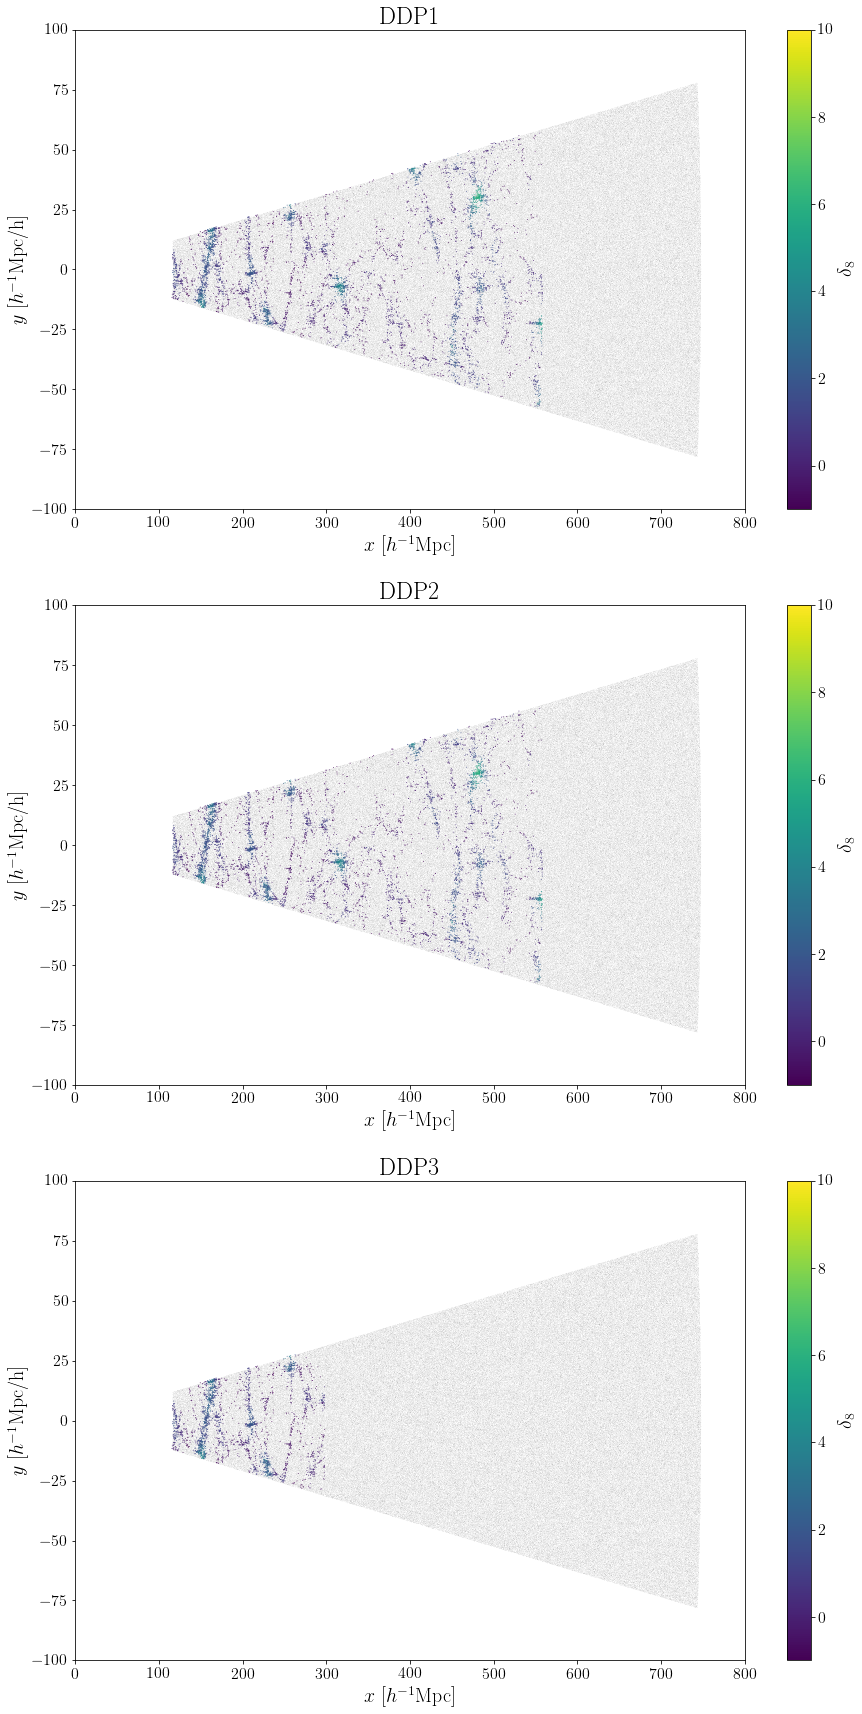

In [36]:
fig, axes     = plt.subplots(3, 1, figsize=(15, 30))

rand_d8       = rand[(rand['FIELD'] == field) & rand['IN_DDP1']]

gama_pos      = np.c_[gama_d8['CARTESIAN_X'], gama_d8['CARTESIAN_Y'], gama_d8['CARTESIAN_Z']]
gama_pos      = rotate(gama_d8['RA'], gama_d8['DEC'], gama_pos) 

rand_pos      = np.c_[rand_d8['CARTESIAN_X'], rand_d8['CARTESIAN_Y'], rand_d8['CARTESIAN_Z']]
rand_pos      = rotate(rand_d8['RANDOM_RA'], rand_d8['RANDOM_DEC'], rand_pos)

zs            = gama_d8['ZGAMA'].data[np.abs(gama_pos[:,2]) < 5.]
fills         = gama_d8['DDP{}_DELTA8'.format(idx+1)][np.abs(gama_pos[:,2]) < 5.]

gama_d8_slice = gama_pos[np.abs(gama_pos[:,2]) < 5.]
rand_d8_slice = rand_pos[np.abs(rand_pos[:,2]) < 5.]

for idx in range(3):
    sc = axes[idx].scatter(rand_d8_slice[:,0],\
                           rand_d8_slice[:,1],\
                           c='k',\
                           alpha=0.01,\
                           marker='.',\
                           lw=0.0,\
                           s=3,\
                           vmin=-1.,\
                           vmax=10.)
    
    is_ddp  = (zs <= gama_d8.meta['DDP{}_ZMAX'.format(idx+1)])
    is_ddp &= (zs >= gama_d8.meta['DDP{}_ZMIN'.format(idx+1)])
    
    sc = axes[idx].scatter(gama_d8_slice[is_ddp,0],\
                           gama_d8_slice[is_ddp,1],\
                           c=fills[is_ddp],\
                           alpha=1.,\
                           marker='.',\
                           lw=0.0,\
                           s=3,\
                           vmin=-1.,\
                           vmax=10.)
    
    axes[idx].set_ylim(100., -100.)
    
    colorbar = fig.colorbar(sc, ax=axes[idx], label=r'$\delta_8$')    
    
    axes[idx].set_xlim(0.0, 800.)
    axes[idx].set_ylim(-100., 100.)
    
    axes[idx].set_xlabel('$x$ [$h^{-1}$Mpc]')
    axes[idx].set_ylabel('$y$ [$h^{-1}$Mpc/h]')
    
    axes[idx].set_title('DDP{}'.format(idx+1))

In [15]:
tiers = delta8_tier(gama_d8['DDP1_DELTA8'])

In [16]:
np.unique(tiers, return_counts=True)

(array([-99,   0,   1,   2,   3,   4,   5,   6,   7,   8]),
 array([ 267, 1024, 1321, 1413, 3971, 7180, 7907, 6760, 2577, 1940]))

In [17]:
realz  = 0
rpaths = [os.environ['HOME'] + '/data/GAMA4/randoms/randoms_G{}_{:d}.fits'.format(ff, realz) for ff in [9, 12, 15]]

print('Reading: {}'.format(rpaths))

rand   = None

for rpath in rpaths:
    if not os.path.isfile(rpath):
        raise  RuntimeError('Expect random bound dist. file for {}; Run bound_dist.py for this field'.format(rpath))

    if rand == None:
        rand = Table.read(rpath)

    else:
        rand = vstack([rand, Table.read(rpath)])

Reading: ['/cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_G9_0.fits', '/cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_G12_0.fits', '/cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_G15_0.fits']


Text(0, 0.5, '$\\delta_{8, DDP2}$')

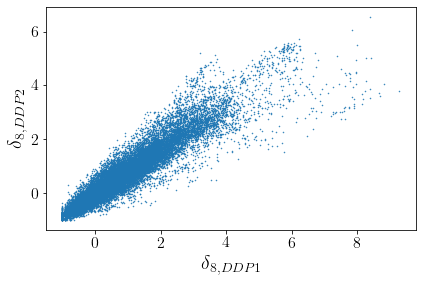

In [18]:
DDP1_ZMIN = gama_d8.meta['DDP1_ZMIN']
DDP2_ZMAX = gama_d8.meta['DDP2_ZMAX']

gama_d8   = gama_d8[gama_d8['ZGAMA'] > DDP1_ZMIN]
gama_d8   = gama_d8[gama_d8['ZGAMA'] < DDP2_ZMAX]

Text(0, 0.5, '$\\delta_{8, DDP2}$')

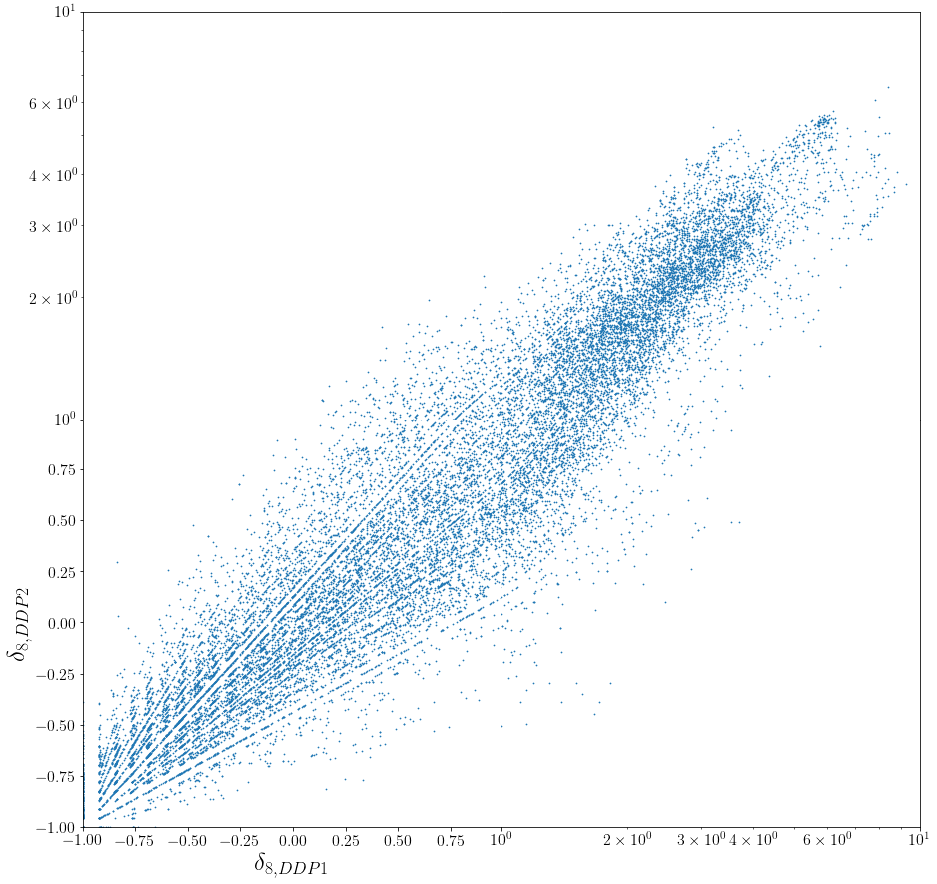

In [19]:
fig, axes = plt.subplots(2,2, figsize=(15, 15), gridspec_kw = {'wspace':0, 'hspace':0})

for i in range(2):
    for j in range(2):
        sc = axes[i,j].scatter(gama_d8['DDP1_DELTA8'],\
                        gama_d8['DDP2_DELTA8'],\
                        marker='.',\
                        lw=0.0,\
                        s=12)

# TODO: There has to be an easier way than this (!)
axes[0,0].set_xlim(-1., 1.)
axes[1,0].set_xlim(-1., 0.99)
axes[0,1].set_xlim(1., 10.)
axes[1,1].set_xlim(1., 10.)
axes[0,1].set_xscale('log')
axes[1,1].set_xscale('log')

axes[1,1].set_ylim(-1., 1.)
axes[0,1].set_ylim(1., 10)
axes[1,0].set_ylim(-1., 0.99)
axes[0,0].set_ylim(1., 10.)

axes[0,1].set_yscale('log')
axes[0,0].set_yscale('log')

axes[0,0].spines['right'].set_visible(False) 
axes[1,0].spines['right'].set_visible(False) 
axes[0,1].spines['left'].set_visible(False) 
axes[1,1].spines['left'].set_visible(False) 
axes[1,1].spines['top'].set_visible(False) 
axes[1,0].spines['top'].set_visible(False) 
axes[0,0].spines['bottom'].set_visible(False) 
axes[0,1].spines['bottom'].set_visible(False) 

axes[0,0].axes.get_xaxis().set_visible(False)
axes[0,1].axes.get_xaxis().set_visible(False)
axes[0,1].axes.get_yaxis().set_visible(False)
axes[1,1].axes.get_yaxis().set_visible(False)

axes[1,0].set_xlabel(r'$\delta_{8, DDP1}$', fontsize=25)
axes[1,0].set_ylabel(r'$\delta_{8, DDP2}$', fontsize=25)

# Done.